# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [13]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

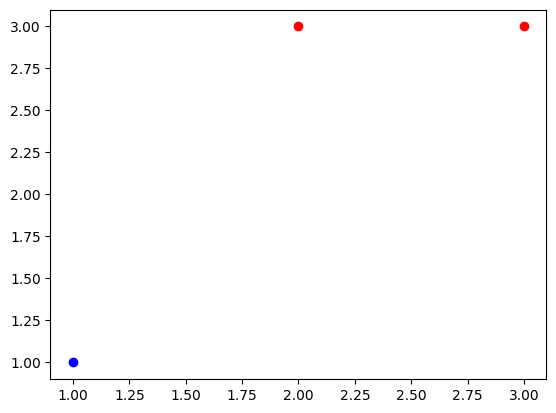

<Figure size 640x480 with 0 Axes>

In [4]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

In [ ]:
# Convertir Y en int pour classification linéaire
Y_int = Y.astype(np.int32).flatten()

# Définir le type de modèle : 0 = linear classifier
model_type = 0
n_samples = X.shape[0]
input_size = X.shape[1]

# Créer le fichier binaire
with open("MachineLib/CasTestBinary/linear_simple.bin", "wb") as f:
    f.write(np.array([model_type, n_samples, input_size], dtype=np.int32).tobytes())
    f.write(X.astype(np.float64).tobytes())
    f.write(Y_int.tobytes())
    
print("Fichier binaire d'entraînement créé : linear_simple.bin")


✅ Fichier binaire d'entraînement créé : linear_simple.bin


In [ ]:
# Convertir Y en int pour perceptron
Y_int = Y.astype(np.int32).flatten()

# Définir le type de modèle : 2 = perceptron Rosenblatt
model_type = 2
n_samples = X.shape[0]
input_size = X.shape[1]

# Créer le fichier binaire
with open("MachineLib/CasTestBinary/perceptron_simple.bin", "wb") as f:
    f.write(np.array([model_type, n_samples, input_size], dtype=np.int32).tobytes())
    f.write(X.astype(np.float64).tobytes())
    f.write(Y_int.tobytes())
    
print("Fichier binaire d'entraînement créé : perceptron_simple.bin")


✅ Fichier binaire d'entraînement créé : perceptron_simple.bin


Poids chargés : [-0.64687873 -0.05132995]
Biais : 1.3


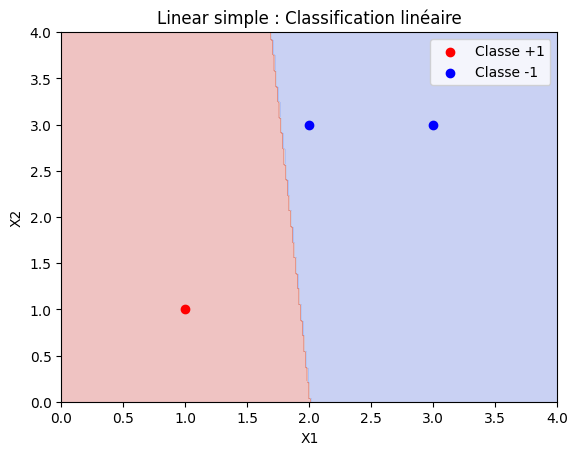

In [14]:
with open("MachineLib/PoidsBinary/linear_simple_w.bin", "rb") as f:
    input_size = np.frombuffer(f.read(4), dtype=np.int32)[0]  # int = 4 bytes
    w = np.frombuffer(f.read(input_size*8), dtype=np.float64)
    b = np.frombuffer(f.read(8), dtype=np.float64)[0]

print("Poids chargés :", w)
print("Biais :", b)

# Visualisation du plan de décision
x_min, x_max = 0, 4
y_min, y_max = 0, 4
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = np.sign(w[0]*xx + w[1]*yy + b)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

# Données
plt.scatter(X[Y==1, 0], X[Y==1, 1], color='red', label='Classe +1')
plt.scatter(X[Y==-1, 0], X[Y==-1, 1], color='blue', label='Classe -1')

plt.title("Linear simple : Classification linéaire")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

Poids chargés : [ 0.  -0.6]
Biais : 0.6000000000000001


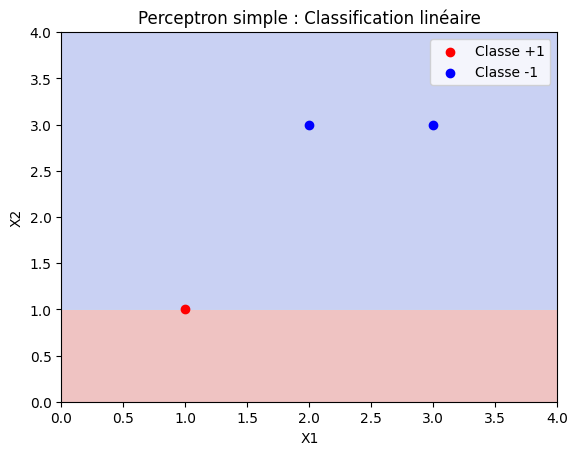

In [16]:
# Charger les poids du perceptron
with open("MachineLib/PoidsBinary/perceptron_simple_w.bin", "rb") as f:
    input_size = np.frombuffer(f.read(4), dtype=np.int32)[0]
    w = np.frombuffer(f.read(input_size*8), dtype=np.float64)
    b = np.frombuffer(f.read(8), dtype=np.float64)[0]

print("Poids chargés :", w)
print("Biais :", b)

# Visualisation du plan de décision
x_min, x_max = 0, 4
y_min, y_max = 0, 4
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = np.sign(w[0]*xx + w[1]*yy + b)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

# Données
plt.scatter(X[Y==1, 0], X[Y==1, 1], color='red', label='Classe +1')
plt.scatter(X[Y==-1, 0], X[Y==-1, 1], color='blue', label='Classe -1')

plt.title("Perceptron simple : Classification linéaire")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

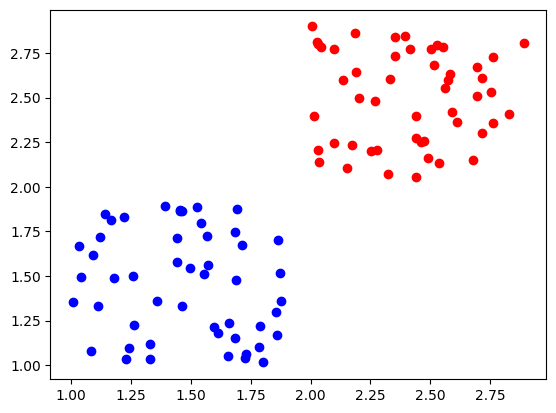

<Figure size 640x480 with 0 Axes>

In [8]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

In [3]:
# Convertir Y en int pour classification linéaire
Y_int = Y.astype(np.int32).flatten()

# Définir le type de modèle : 0 = linear classifier
model_type = 0
n_samples = X.shape[0]
input_size = X.shape[1]

# Créer le fichier binaire
with open("linear_data.bin", "wb") as f:
    # Écrire le type de modèle et dimensions
    f.write(np.array([model_type, n_samples, input_size], dtype=np.int32).tobytes())
    # Écrire X
    f.write(X.astype(np.float64).tobytes())
    # Écrire Y
    f.write(Y_int.tobytes())
    
print("Fichier binaire d'entraînement créé : linear_data.bin")

Fichier binaire d'entraînement créé : linear_data.bin


Poids chargés : [-0.64687873 -0.05132995]
Biais : 1.3


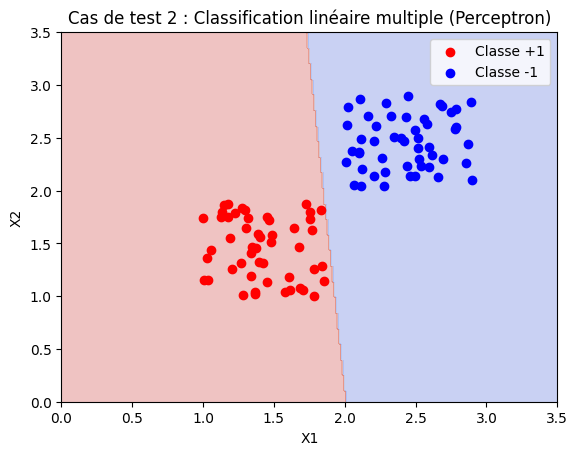

In [6]:
# Charger les poids depuis le fichier généré par le programme C
with open("Machinelib/PoidsBinary/linear_multiple_w.bin", "rb") as f:
    input_size = np.frombuffer(f.read(4), dtype=np.int32)[0]  # int = 4 bytes
    w = np.frombuffer(f.read(input_size*8), dtype=np.float64)
    b = np.frombuffer(f.read(8), dtype=np.float64)[0]

print("Poids chargés :", w)
print("Biais :", b)

# Visualisation du plan de décision
x_min, x_max = 0, 3.5
y_min, y_max = 0, 3.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = np.sign(w[0]*xx + w[1]*yy + b)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

# Données
plt.scatter(X[0:50, 0], X[0:50, 1], color='red', label='Classe +1')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', label='Classe -1')

plt.title("Cas de test 2 : Classification linéaire multiple (Perceptron)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [19]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

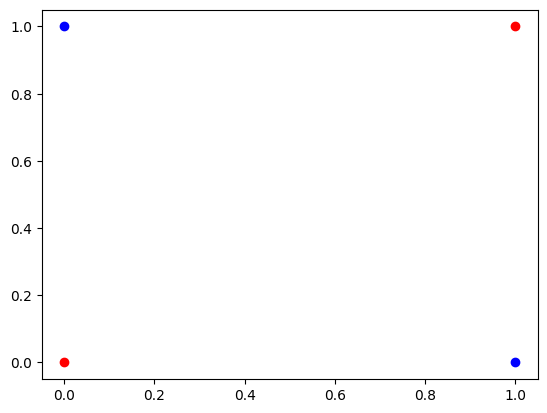

<Figure size 640x480 with 0 Axes>

In [20]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

In [ ]:
#MLP

#avec retroprapagation du gradient stochastique



Fichier binaire créé : xor_perceptron.bin


























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

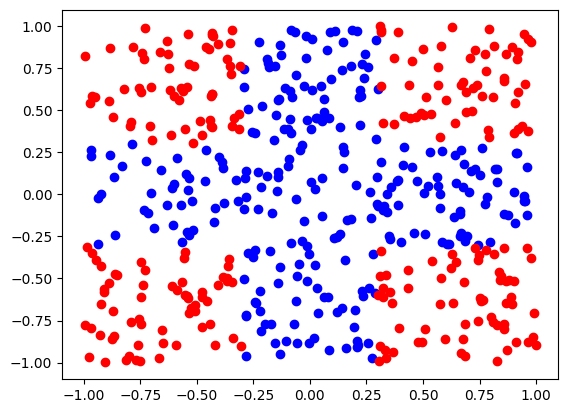

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [23]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [-1, -1, -1]for p in X])

X = X[[not np.all(arr == [-1, -1, -1]) for arr in Y]]
Y = Y[[not np.all(arr == [-1, -1, -1]) for arr in Y]]

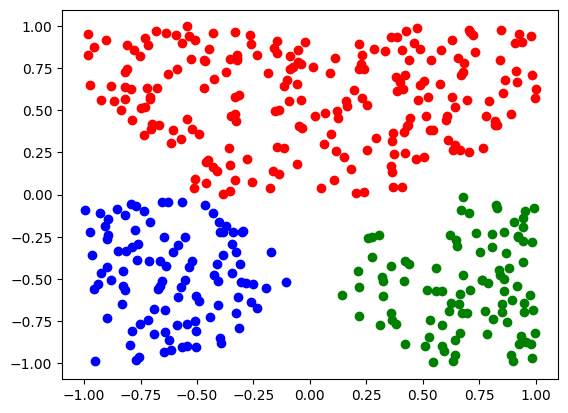

<Figure size 640x480 with 0 Axes>

In [24]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [25]:


n_samples = X.shape[0]
input_size = X.shape[1]
n_classes = Y.shape[1]

for c in range(n_classes):
    Y_class = Y[:, c].astype(np.int32).flatten()
    model_type = 0  # Linear classifier

    filename = f"MachineLib/CasTestBinary/linear_X3_class{c}.bin"
    with open(filename, "wb") as f:
        # Ecrire type de modèle, nombre de samples, taille input
        f.write(np.array([model_type, n_samples, input_size], dtype=np.int32).tobytes())
        # Ecrire X
        f.write(X.astype(np.float64).tobytes())
        # Ecrire Y de la classe
        f.write(Y_class.tobytes())
    print(f"Fichier binaire créé : {filename}")


Fichier binaire créé : MachineLib/CasTestBinary/linear_X3_class0.bin
Fichier binaire créé : MachineLib/CasTestBinary/linear_X3_class1.bin
Fichier binaire créé : MachineLib/CasTestBinary/linear_X3_class2.bin


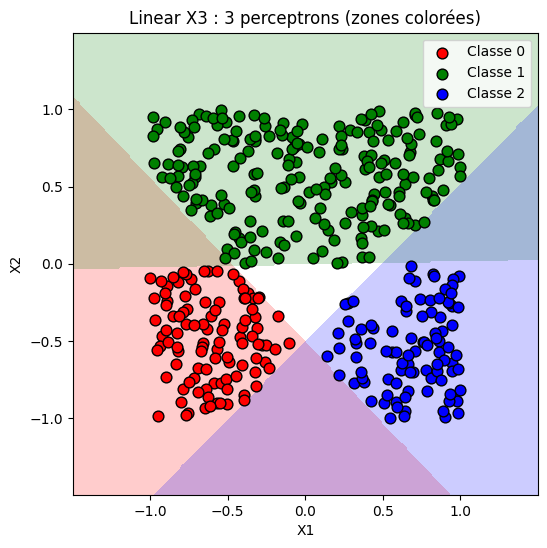

In [27]:

colors = ['red', 'green', 'blue']
plt.figure(figsize=(6,6))

x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Pour chaque perceptron, colorer le fond
Z_total = np.zeros_like(xx)
for c in range(n_classes):
    with open(f"Machinelib/PoidsBinary/linear_X3_class{c}_w.bin", "rb") as f:
        input_size = np.frombuffer(f.read(4), dtype=np.int32)[0]
        w = np.frombuffer(f.read(input_size*8), dtype=np.float64)
        b = np.frombuffer(f.read(8), dtype=np.float64)[0]

    Z = np.sign(w[0]*xx + w[1]*yy + b)
    # Ajouter une couleur semi-transparente pour les zones positives
    plt.contourf(xx, yy, Z, levels=[0, 1], colors=[colors[c]], alpha=0.2)

# Points réels
for c in range(n_classes):
    mask = Y[:,c] == 1
    plt.scatter(X[mask,0], X[mask,1], color=colors[c], label=f'Classe {c}', edgecolor='k', s=60)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Linear X3 : 3 perceptrons (zones colorées)")
plt.legend()
plt.show()


### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X])

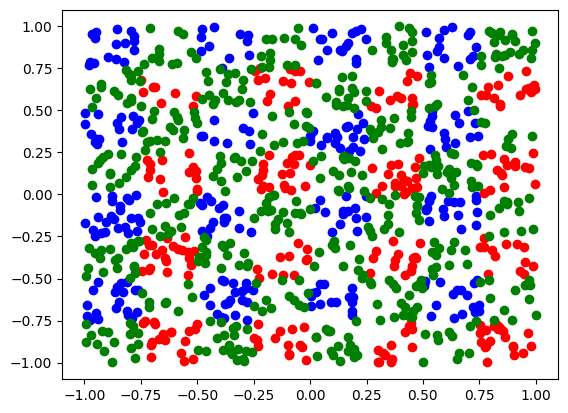

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

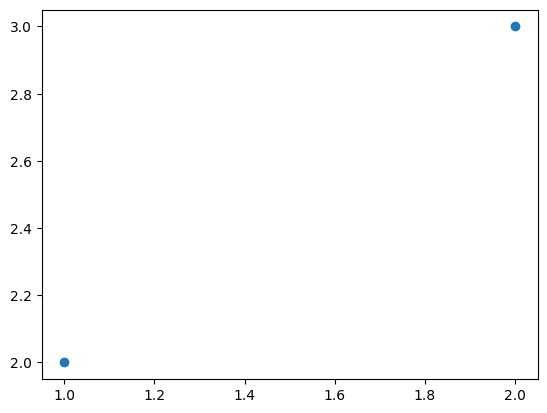

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

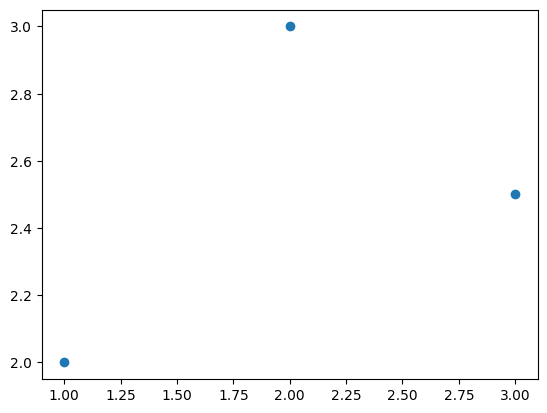

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [28]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [31]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

In [32]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
#MLP exemple
from typing import List
class MyMlp:
    def __init__(self, npl: List[int]):
        self.npl = list(npl)
        self.W = []

        for l in range(0,len(npl)):
            self.W.append([])
            if l == 0:
                continue

            for i in range(0,self.npl[l - 1] + 1):
                self.W[i].append([])
                for j in range(0, self.npl[l - 1] +1):
                    rdm_value = random.random() * 2.0 - 1.0
                    self.W[l][i].append(0.0 if j == 0 else rdm_value)
            self.X = []
            self.deltas = []

            for l in range(0,len(self.npl)):
                self.X.append([])
                self.deltas.append([])

            for j in range(0, self.npl[l] + 1):
                self.X[l].append(1.0 if j == 0.0 else 0.0)
                self.deltas[l].append(0.0)

            def _propagate(self, inputs: List[float]):
                assert(len(inputs) == self.npl[0])
                for j in range(len(inputs)):
                    self.X[0][j + 1] = inputs[j]

                for l in range(1, self.L, + 1):
                    for j in range(1, self.npl[0] + 1):
                        signal = 0.0
                        for i in range(0, self.d[l - 1] + 1):
                            signal += self.W[l][i][j]

In [ ]:
mpl = MyMlp([])
print(mpl.W)
print(mpl.X)
print(mpl.deltas)